# WeatherPy

This WeatherPy code collects API data from a random selection of 500 or more cities around the globe.
The data from those cities is plotted to determine if there is a correlation between the latitude and weather.

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress
import datetime as dt

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#Get today's date to add to plot titles
date = dt.datetime.now()
date = date.strftime("%m/%d/%Y")

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [28]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls

In [48]:
# Base URL from the OpenWeatherMap API
url = "http://api.openweathermap.org/data/2.5/weather?"

# Create the query URL
query_url = f"{url}appid={weather_api_key}&units=imperial&q="

#Create lists to store the data
city_name= []
city_id = []
lat = []
lon = []
temp = []
humid = []
clouds = []
wind = []

#Running a query to get the weather data for each city in the cites list
print("Beginning Data Retrieval\n----------------------")
for city in cities:
    try:
        query = query_url + city  
        city_data = requests.get(query).json()
        #Print out each city and its ID as it is being processed
        id_number = city_data['id']
        #print(json.dumps(city_data, indent=4))
        print('''Processing...City Name: {0} 
             City ID: {1}'''.format(city, id_number))    
        #Each element of data is being appended to a coorsponding list as it is processed
        city_name.append(city_data['name'])
        city_id.append(city_data['id'])
        lat.append(city_data['coord']['lat'])
        lon.append(city_data['coord']['lon'])
        temp.append(city_data['main']['temp'])
        humid.append(city_data['main']['humidity'])
        clouds.append(city_data['clouds']['all'])
        wind.append(city_data['wind']['speed'])  
    # If the city is not found in OpenWeatherMap, skip it
    except:
        print("City not found. Skipping...")
        pass
print("----------------------\nData Retrieval Complete\n----------------------")
       

Beginning Data Retrieval
----------------------
Processing...City Name: vardo 
             City ID: 777019
Processing...City Name: avarua 
             City ID: 4035715
Processing...City Name: richards bay 
             City ID: 962367
City not found. Skipping...
Processing...City Name: tiksi 
             City ID: 2015306
Processing...City Name: qaanaaq 
             City ID: 3831208
Processing...City Name: mumford 
             City ID: 2297810
Processing...City Name: bredasdorp 
             City ID: 1015776
Processing...City Name: lebu 
             City ID: 3883457
Processing...City Name: sitka 
             City ID: 5557293
Processing...City Name: punta arenas 
             City ID: 3874787
Processing...City Name: severo-kurilsk 
             City ID: 2121385
Processing...City Name: mangaratiba 
             City ID: 3457991
Processing...City Name: nangal 
             City ID: 1261922
Processing...City Name: kapaa 
             City ID: 5848280
Processing...City Name: hithadhoo

Processing...City Name: salalah 
             City ID: 286621
Processing...City Name: kavaratti 
             City ID: 1267390
Processing...City Name: hasaki 
             City ID: 2112802
Processing...City Name: marzuq 
             City ID: 72181
Processing...City Name: pemangkat 
             City ID: 1631637
Processing...City Name: namibe 
             City ID: 3347019
Processing...City Name: lavrentiya 
             City ID: 4031637
Processing...City Name: plouzane 
             City ID: 2986626
Processing...City Name: provideniya 
             City ID: 4031574
Processing...City Name: tiznit 
             City ID: 2527087
City not found. Skipping...
Processing...City Name: arraial do cabo 
             City ID: 3471451
Processing...City Name: mar del plata 
             City ID: 3430863
Processing...City Name: nacala 
             City ID: 1035025
Processing...City Name: fortuna 
             City ID: 5563839
Processing...City Name: coquimbo 
             City ID: 3893629
Processi

Processing...City Name: lewisporte 
             City ID: 6053446
Processing...City Name: mecca 
             City ID: 104515
Processing...City Name: fukue 
             City ID: 1863997
Processing...City Name: narsaq 
             City ID: 3421719
Processing...City Name: iki-burul 
             City ID: 557413
Processing...City Name: road town 
             City ID: 3577430
City not found. Skipping...
Processing...City Name: upernavik 
             City ID: 3418910
Processing...City Name: beyneu 
             City ID: 610298
City not found. Skipping...
Processing...City Name: russell 
             City ID: 4047434
Processing...City Name: gravdal 
             City ID: 3155152
Processing...City Name: katsuura 
             City ID: 2112309
Processing...City Name: puri 
             City ID: 1259184
Processing...City Name: solok 
             City ID: 1626649
Processing...City Name: saldanha 
             City ID: 3361934
Processing...City Name: tura 
             City ID: 1254046
Proce

Processing...City Name: sembe 
             City ID: 2255304
Processing...City Name: seddon 
             City ID: 7281807
Processing...City Name: lompoc 
             City ID: 5367788
Processing...City Name: souillac 
             City ID: 933995
Processing...City Name: wattegama 
             City ID: 1224061
Processing...City Name: comodoro rivadavia 
             City ID: 3860443
Processing...City Name: bay roberts 
             City ID: 5895424
Processing...City Name: kloulklubed 
             City ID: 7671223
Processing...City Name: savannah bight 
             City ID: 3601402
Processing...City Name: galle 
             City ID: 1246294
Processing...City Name: zakharovo 
             City ID: 465446
City not found. Skipping...
Processing...City Name: goderich 
             City ID: 5962442
Processing...City Name: shubarkuduk 
             City ID: 608271
Processing...City Name: grand forks 
             City ID: 5059429
Processing...City Name: aasiaat 
             City ID: 3424

Processing...City Name: alice town 
             City ID: 3572924
Processing...City Name: mattru 
             City ID: 2409215
Processing...City Name: christchurch 
             City ID: 2192362
City not found. Skipping...
Processing...City Name: alugan 
             City ID: 1731248
Processing...City Name: avera 
             City ID: 4231997
Processing...City Name: antalaha 
             City ID: 1071296
Processing...City Name: olinda 
             City ID: 3393536
Processing...City Name: gubkinskiy 
             City ID: 1539209
Processing...City Name: tazmalt 
             City ID: 2477537
Processing...City Name: moussoro 
             City ID: 2427336
Processing...City Name: kingston 
             City ID: 3489854
Processing...City Name: tuatapere 
             City ID: 2180815
Processing...City Name: tucuman 
             City ID: 3836873
Processing...City Name: cam ranh 
             City ID: 1586350
Processing...City Name: dunedin 
             City ID: 2191562
Processing...Ci

### Convert Raw Data to DataFrame

In [50]:
#Creating a dictionary of the weather stats for ecach city
weather_dict = {"City Name": city_name,
                "City ID": city_id, 
                "Latitude": lat,
                "Longitude": lon,
                "Temp(F)": temp,
                "Humidity(%)": humid,
                "Cloudiness(%)": clouds,
                "Wind Speed(mph)": wind}

#Making a dataframe table of the dictionary data
weather_data = pd.DataFrame(weather_dict) 

#Exporting the data to a csv file without the Pandas index, but with the header
weather_data.to_csv("out_put/cities.csv", encoding="utf-8", index=False, header=True)
weather_data.head()

,City Name,City ID,Latitude,Longitude,Temp(F),Humidity(%),Cloudiness(%),Wind Speed(mph)
0,Vardø,777019,70.37,31.11,53.60,87,75,26.40
1,Avarua,4035715,-21.21,-159.78,68.00,94,43,13.87
2,Richards Bay,962367,-28.78,32.04,64.76,87,71,4.74
3,Tiksi,2015306,71.69,128.87,39.45,86,84,7.92
4,Qaanaaq,3831208,77.48,-69.36,42.96,71,89,1.21


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [51]:
#Checking the weather dataframe to make sure no citites are over 100 percent humidity.
too_humid = weather_data["Humidity(%)"] > 100
for value in too_humid:
    if value == "True":
        print("A city has over 100% humidity.")
print("All cities checked for humidity range compliance.")

All cities checked for humidity range compliance.


## Plotting the Data
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

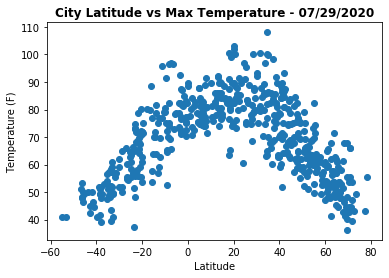

The WeatherPy code collects API data from a random selection of 500 or more cities around the globe.
The data from those cities is plotted to determine if there is a correlation between the latitude and temperature.


In [34]:
# Plot the latitude of the city compared to its temperature
city_lat = weather_data['Latitude']
temp = weather_data['Temp(F)']
plt.scatter(city_lat, temp)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title(f'City Latitude vs Max Temperature - {date}', fontweight="black")
plt.show()
print(f'The WeatherPy code collects API data from a random selection of 500 or more cities around the globe.\nThe data from those cities is plotted to determine if there is a correlation between the latitude and temperature.')


## Latitude vs. Humidity Plot

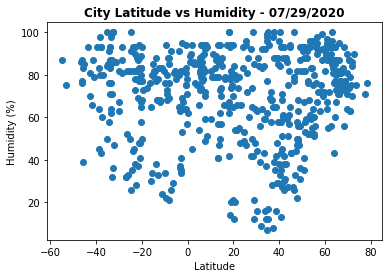

The WeatherPy code collects API data from a random selection of 500 or more cities around the globe.
The data from those cities is plotted to determine if there is a correlation between the latitude and humidity.


In [35]:
# Plot the latitude of the city compared to its humidity
city_lat = weather_data['Latitude']
humidity = weather_data['Humidity(%)']
plt.scatter(city_lat, humidity)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity - {date}', fontweight="black")
plt.show()
print(f'The WeatherPy code collects API data from a random selection of 500 or more cities around the globe.\nThe data from those cities is plotted to determine if there is a correlation between the latitude and humidity.')


## Latitude vs. Cloudiness Plot

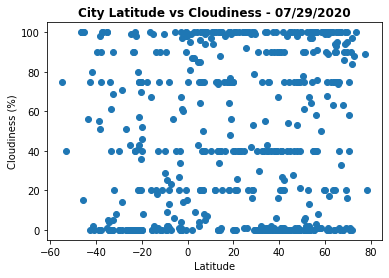

The WeatherPy code collects API data from a random selection of 500 or more cities around the globe.
The data from those cities is plotted to determine if there is a correlation between the latitude and cloudiness.


In [36]:
# Plot the latitude of the city compared to its cloudiness
city_lat = weather_data['Latitude']
clouds = weather_data['Cloudiness(%)']
plt.scatter(city_lat, clouds)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness - {date}', fontweight="black")
plt.show()
print(f'The WeatherPy code collects API data from a random selection of 500 or more cities around the globe.\nThe data from those cities is plotted to determine if there is a correlation between the latitude and cloudiness.')


## Latitude vs. Wind Speed Plot

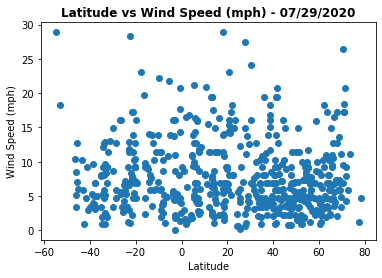

The WeatherPy code collects API data from a random selection of 500 or more cities around the globe.
The data from those cities is plotted to determine if there is a correlation between the latitude and wind speed.


In [37]:
# Plot the latitude of the city compared to its wind speed
city_lat = weather_data['Latitude']
wind = weather_data['Wind Speed(mph)']
plt.scatter(city_lat, wind)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Latitude vs Wind Speed (mph) - {date}', fontweight="black")
plt.show()
print(f'The WeatherPy code collects API data from a random selection of 500 or more cities around the globe.\nThe data from those cities is plotted to determine if there is a correlation between the latitude and wind speed.')


## Linear Regression

In [38]:
# If the city latitude is greater than zero it is in the northern hemisphere
northern_data = weather_data.loc[weather_data['Latitude'] > 0]
# If the city latitude is less than zero it is in the southern hemisphere
southern_data = weather_data.loc[weather_data['Latitude'] < 0]

In [39]:
#This function creates and plots a liner regression line and equation, and returns the r-squared value
def linear_regression(city_lat, weather):
    x_values = city_lat
    y_values = weather
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(20, 40), fontsize=12,color="red")
    return print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Temp vs. Latitude Linear Regression

The r-squared is: 0.5440494106597313


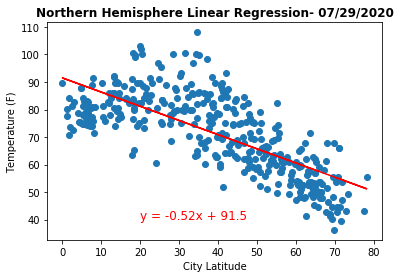

In [40]:
# Plot the latitude of the city compared to its temperature
city_lat = northern_data['Latitude']
temp = northern_data['Temp(F)']
plt.scatter(city_lat, temp)
plt.xlabel('City Latitude')
plt.ylabel('Temperature (F)')
plt.title(f'Northern Hemisphere Linear Regression- {date}', fontweight="black")
#Passing in weather data and city latitude to the funtion that creates the linear regression 
linear_regression(city_lat, temp)
plt.show()
#print(f'The WeatherPy code collects API data from a random selection of 500 or more cities around the globe.\nThe data from those cities is plotted to determine if there is a correlation between the latitude and temperature.')

####  Southern Hemisphere - Temp vs. Latitude Linear Regression

The r-squared is: 0.6691794860146925


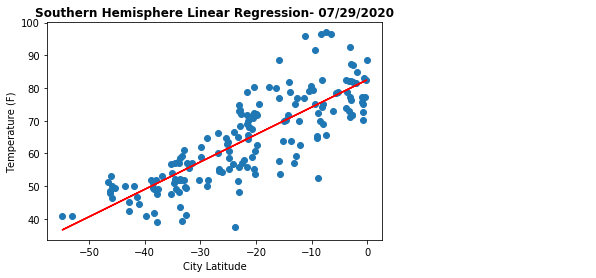

In [41]:
# Plot the latitude of the city compared to its temperature
city_lat = southern_data['Latitude']
temp = southern_data['Temp(F)']
plt.scatter(city_lat, temp)
plt.xlabel('City Latitude')
plt.ylabel('Temperature (F)')
plt.title(f'Southern Hemisphere Linear Regression- {date}', fontweight="black")
#Passing in weather data and city latitude to the funtion that creates the linear regression 
linear_regression(city_lat, temp)
plt.show()
#print(f'The WeatherPy code collects API data from a random selection of 500 or more cities around the globe.\nThe data from those cities is plotted to determine if there is a correlation between the latitude and temperature.')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.002892486745016136


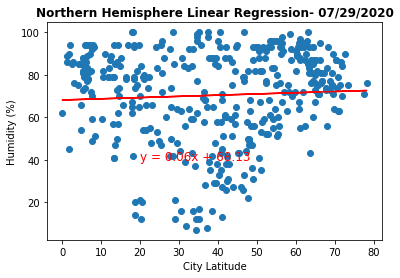

The WeatherPy code collects API data from a random selection of 500 or more cities around the globe.
The data from those cities is plotted to determine if there is a correlation between the latitude and humidity.


In [42]:
# Plot the latitude of the city compared to its humidity
city_lat = northern_data['Latitude']
humidity = northern_data['Humidity(%)']
plt.scatter(city_lat, humidity)
plt.xlabel('City Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Northern Hemisphere Linear Regression- {date}', fontweight="black")
#Passing in weather data and city latitude to the funtion that creates the linear regression 
linear_regression(city_lat, humidity)
plt.show()
print(f'The WeatherPy code collects API data from a random selection of 500 or more cities around the globe.\nThe data from those cities is plotted to determine if there is a correlation between the latitude and humidity.')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0352811989448007


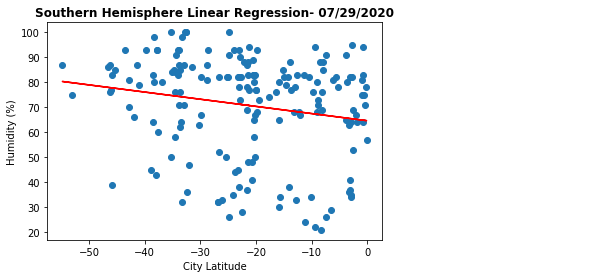

The WeatherPy code collects API data from a random selection of 500 or more cities around the globe.
The data from those cities is plotted to determine if there is a correlation between the latitude and humidity.


In [43]:
# Plot the latitude of the city compared to its humidity
city_lat = southern_data['Latitude']
humidity = southern_data['Humidity(%)']
plt.scatter(city_lat, humidity)
plt.xlabel('City Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Southern Hemisphere Linear Regression- {date}', fontweight="black")
#Passing in weather data and city latitude to the funtion that creates the linear regression 
linear_regression(city_lat, humidity)
plt.show()
print(f'The WeatherPy code collects API data from a random selection of 500 or more cities around the globe.\nThe data from those cities is plotted to determine if there is a correlation between the latitude and humidity.')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0007948631019261614


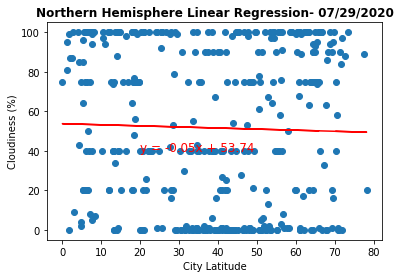

The WeatherPy code collects API data from a random selection of 500 or more cities around the globe.
The data from those cities is plotted to determine if there is a correlation between the latitude and cloudiness.


In [44]:
# Plot the latitude of the city compared to its cloudiness
city_lat = northern_data['Latitude']
clouds = northern_data['Cloudiness(%)']
plt.scatter(city_lat, clouds)
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Northern Hemisphere Linear Regression- {date}', fontweight="black")
#Passing in weather data and city latitude to the funtion that creates the linear regression 
linear_regression(city_lat, clouds)
plt.show()
print(f'The WeatherPy code collects API data from a random selection of 500 or more cities around the globe.\nThe data from those cities is plotted to determine if there is a correlation between the latitude and cloudiness.')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.004232521618070619


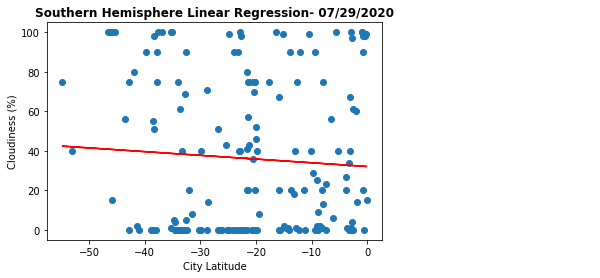

The WeatherPy code collects API data from a random selection of 500 or more cities around the globe.
The data from those cities is plotted to determine if there is a correlation between the latitude and cloudiness.


In [45]:
# Plot the latitude of the city compared to its cloudiness
city_lat = southern_data['Latitude']
clouds = southern_data['Cloudiness(%)']
plt.scatter(city_lat, clouds)
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Southern Hemisphere Linear Regression- {date}', fontweight="black")
#Passing in weather data and city latitude to the funtion that creates the linear regression 
linear_regression(city_lat, clouds)
plt.show()
print(f'The WeatherPy code collects API data from a random selection of 500 or more cities around the globe.\nThe data from those cities is plotted to determine if there is a correlation between the latitude and cloudiness.')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01381012247783689


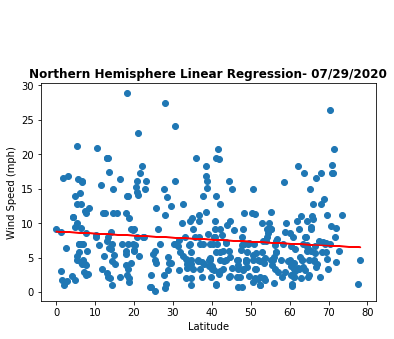

The WeatherPy code collects API data from a random selection of 500 or more cities around the globe.
The data from those cities is plotted to determine if there is a correlation between the latitude and wind speed.


In [46]:
# Plot the latitude of the city compared to its wind speed
city_lat = northern_data['Latitude']
wind = northern_data['Wind Speed(mph)']
plt.scatter(city_lat, wind)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Northern Hemisphere Linear Regression- {date}', fontweight="black")
#Passing in weather data and city latitude to the funtion that creates the linear regression 
linear_regression(city_lat, wind)
plt.show()
print(f'The WeatherPy code collects API data from a random selection of 500 or more cities around the globe.\nThe data from those cities is plotted to determine if there is a correlation between the latitude and wind speed.')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00032397950843452626


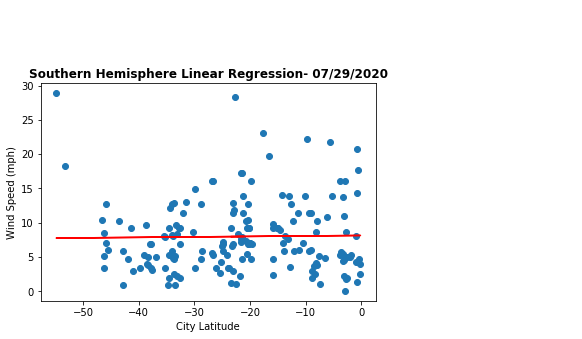

The WeatherPy code collects API data from a random selection of 500 or more cities around the globe.
The data from those cities is plotted to determine if there is a correlation between the latitude and wind speed.


In [47]:
# Plot the latitude of the city compared to its wind speed
city_lat = southern_data['Latitude']
wind = southern_data['Wind Speed(mph)']
plt.scatter(city_lat, wind)
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Southern Hemisphere Linear Regression- {date}', fontweight="black")
#Passing in weather data and city latitude to the funtion that creates the linear regression 
linear_regression(city_lat, wind)
plt.show()
print(f'The WeatherPy code collects API data from a random selection of 500 or more cities around the globe.\nThe data from those cities is plotted to determine if there is a correlation between the latitude and wind speed.')